In [1]:
import numpy as np

IDnumber = 3402
rocString = "data/pyData/{}/{}_nestedROC_AUC.txt"
testsetString = "data/pyData/{}/{}_nestTestROC_AUC.txt"
yscoreString = "data/pyData/{}/{}_yScoreTest.txt"
yscoreTrainString = "data/pyData/{}/{}_yScoreTrain.txt"

roc_auc = np.loadtxt(rocString.format(IDnumber, IDnumber), delimiter = '\t')
testset_roc_auc = np.loadtxt(testsetString.format(IDnumber, IDnumber), delimiter = '\t')
y_scoreArr = np.loadtxt(yscoreString.format(IDnumber, IDnumber), delimiter = '\t')
y_scoreTrainArr = np.loadtxt(yscoreTrainString.format(IDnumber, IDnumber), delimiter = '\t')

numDay = y_scoreArr.shape[0]
duration = y_scoreArr.shape[1]

string0 = "data/pyData/{}/{}_7x1x1Components.txt"
components = np.loadtxt(string0.format(IDnumber, IDnumber), delimiter = '\t')

roc_auc = roc_auc.reshape(numDay, (numDay-1), roc_auc.shape[1])

y_score = [np.zeros((duration)) for _ in range(numDay)]

for d in range(0, numDay):
    y_score[d] = y_scoreArr[d, :]
    
y_scoreTrain = [np.zeros((duration)) for _ in range(numDay)]

for d in range(0, numDay):
    y_scoreTrain[d] = y_scoreTrainArr[d, :]
    
Y_arr = np.concatenate((np.zeros(180), np.ones(90), np.zeros(90), np.ones(90), np.zeros(89)))
Y_arr = [Y_arr for _ in range(numDay)]

Y_arrTrain = np.zeros(((numDay-1)*duration))
for d in range(0, numDay-1):
    Y_arrTrain[range(d*duration, (d+1)*duration)] = np.concatenate((np.zeros(180), np.ones(90), np.zeros(90), np.ones(90), np.zeros(89)))

Y_arrTrain = [Y_arrTrain for _ in range(numDay)]

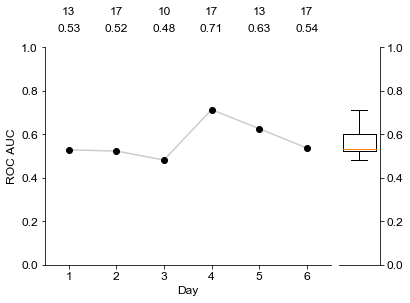

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["font.size"] = 12

s1 = plt.figure()
ax0 = plt.subplot2grid((1, numDay+1), (0, 0), colspan = numDay)
plt.plot(range(1,numDay+1), testset_roc_auc[:, 1], linestyle = '-', c = '0.8')
plt.plot(range(1,numDay+1), testset_roc_auc[:, 1], 'ko')

plt.ylim([0, 1])
plt.ylabel('ROC AUC')
plt.xlim([0.5, numDay+0.5])
plt.xlabel('Day')
plt.xticks(np.arange(1, numDay+1))

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

if np.std(testset_roc_auc[:, 0]) == 0:
    plt.text(0.75, 1.075, 'Mean AUC = %0.2f' % (np.mean(testset_roc_auc[:, 1])), horizontalalignment = 'left')
    plt.text(0.75, 1.15, 'Components | %0.0f' % (testset_roc_auc[0, 0]), horizontalalignment = 'left')
else:
    for d in range(0, numDay):
        plt.text(d+1, 1.075, '%0.2f' % (testset_roc_auc[d, 1]), horizontalalignment = 'center')
        plt.text(d+1, 1.15, '%0.0f' % (testset_roc_auc[d, 0]), horizontalalignment = 'center')

ax1 = plt.subplot2grid((1, numDay+1), (0, numDay), colspan = 1, sharey=ax0)
plt.boxplot(testset_roc_auc[:, 1], widths = 0.8)

plt.ylim([0, 1])
plt.xticks([0], (''))

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.yaxis.tick_right()

plt.show()

s = "data/pyData/GraphOutput/{}_bestROC"
s1.savefig(s.format(IDnumber))

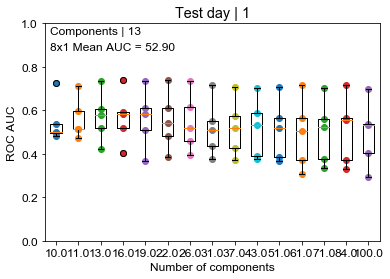

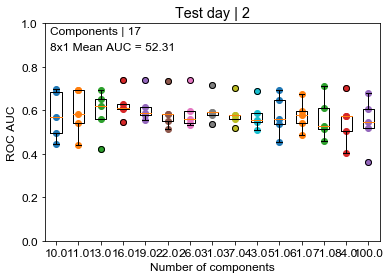

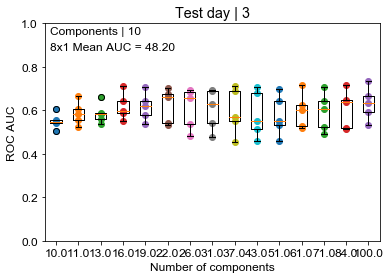

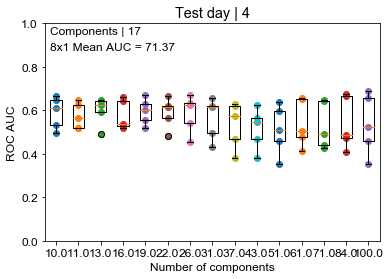

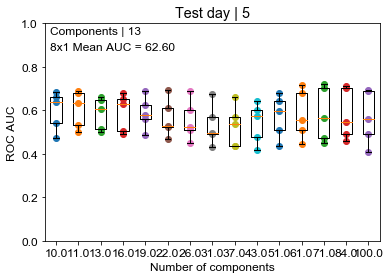

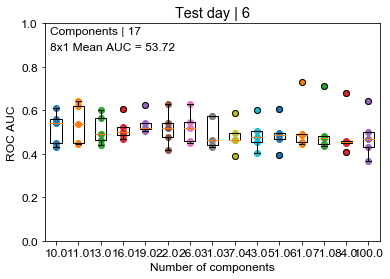

In [3]:
for t in range(0, numDay):
    for k in range(len(components)):
        if components[k] == testset_roc_auc[t, 0]: comp = k
        plt.scatter([k+1]*len(roc_auc[t, :, k]), roc_auc[t, :, k])

    plt.boxplot(roc_auc[t, :, :])
    plt.ylim([0, 1])
    plt.ylabel('ROC AUC')
    plt.xticks(np.arange(1, 1+len(components)), components)
    plt.xlabel('Number of components')
    plt.title('Test day | %0.0f' %(t+1))
    plt.text(0.75, 0.875, '8x1 Mean AUC = %0.2f' % (testset_roc_auc[t, 1]*100), horizontalalignment = 'left')
    plt.text(0.75, 0.95, 'Components | %0.0f' % (testset_roc_auc[t, 0]), horizontalalignment = 'left')
    plt.show()

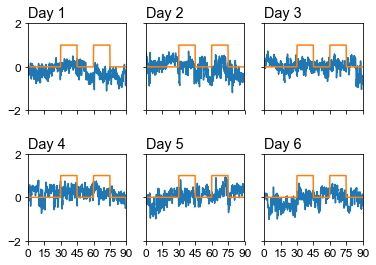

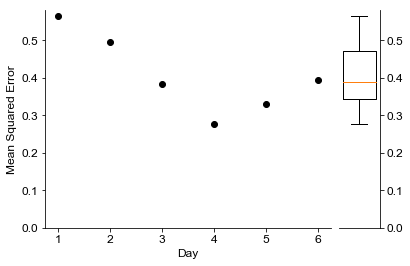

In [4]:
fig, ax = plt.subplots(int(numDay/3), 3, sharex = True, sharey = True)
s = "Day {}"
for k in range(0, numDay):
    ax[int(k/3), int(np.mod(k, 3))].plot(range(0, duration), y_score[k])
    ax[int(k/3), int(np.mod(k, 3))].plot(range(0, duration), Y_arr[k])
    ax[int(k/3), int(np.mod(k, 3))].set_title(s.format(str(k+1)), loc = 'left')
    ax[int(k/3), int(np.mod(k, 3))].set_ylim(-2, 2)
    ax[int(k/3), int(np.mod(k, 3))].set_xlim(0, duration)
    ax[int(k/3), int(np.mod(k, 3))].set_xticks(np.arange(0, duration+90, 90))
    ax[int(k/3), int(np.mod(k, 3))].set_xticklabels(np.arange(0, (duration+90)/6, 15, dtype = int))
    if k > 5: ax[int(k/3), int(np.mod(k, 3))].set_xlabel('Time (minutes)')
fig.subplots_adjust(hspace=.5)
plt.show()

err = [0]*numDay

for k in range(0, numDay):
    err[k] = np.sum((y_score[k]-Y_arr[k])**2)/duration
    
plt.figure()
ax0 = plt.subplot2grid((1, numDay+1), (0, 0), colspan = numDay)
plt.plot(range(1, numDay+1), err, 'ko')
plt.xlabel('Day')
plt.ylabel('Mean Squared Error')

_, maximum = ax0.get_ylim()

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax1 = plt.subplot2grid((1, numDay+1), (0, numDay), colspan = 1, sharey=ax0)
plt.boxplot(err, widths = 0.8)

plt.xticks([0], (''))

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.yaxis.tick_right()
ax1.set_ylim([0, maximum])

plt.show()

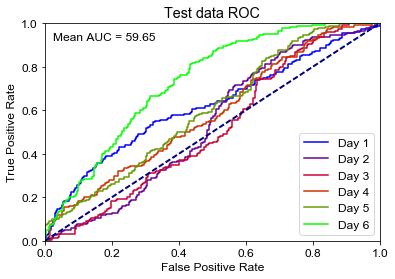

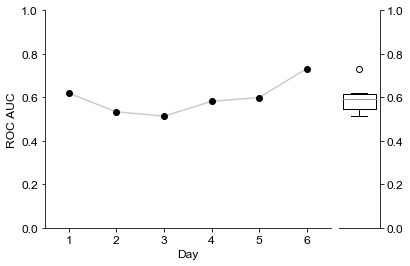

Mean performance (ROC AUC): 59.65%
Coefficient of variation: 11.881%


In [5]:
from sklearn.metrics import roc_curve, auc
from matplotlib.pyplot import cm

fpr = [0] * numDay
tpr = [0] * numDay
rocAUC = [0] * numDay
s1 = plt.figure()

color = cm.brg(np.linspace(0, 1, numDay))
s = "Day {}"

for k in range(numDay):
    fpr[k], tpr[k], _ = roc_curve(Y_arr[k], y_score[k])
    rocAUC[k] = auc(fpr[k], tpr[k])

    plt.plot(fpr[k], tpr[k], c = color[k], label = s.format(k+1))
        
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.025, 0.925, 'Mean AUC = %0.2f' % (np.mean(rocAUC)*100), horizontalalignment = 'left')
plt.legend(loc = 'lower right')

plt.title('Test data ROC')
plt.show()

s = "data/pyData/GraphOutput/{}_TestROC"
s1.savefig(s.format(IDnumber))

s2 = plt.figure()
ax0 = plt.subplot2grid((1, numDay+1), (0, 0), colspan = numDay)
plt.plot(range(1,numDay+1), rocAUC, linestyle = '-', c = '0.8')
plt.plot(range(1,numDay+1), rocAUC, 'ko')

plt.ylim([0, 1])
plt.ylabel('ROC AUC')
plt.xlim([0.5, numDay+0.5])
plt.xlabel('Day')
plt.xticks(np.arange(1, numDay+1))

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax1 = plt.subplot2grid((1, numDay+1), (0, numDay), colspan = 1, sharey=ax0)
plt.boxplot(rocAUC, widths = 0.8)

plt.ylim([0, 1])
plt.xticks([0], (''))

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.yaxis.tick_right()

plt.show()

s = "data/pyData/GraphOutput/{}_TestROCQuant"
s2.savefig(s.format(IDnumber))

s = "Mean performance (ROC AUC): {0:.2f}%"
print(s.format(np.mean(rocAUC)*100))
s = "Coefficient of variation: {0:.3f}%"
print(s.format(np.std(rocAUC)/np.mean(rocAUC)*100))

perf = rocAUC[:]
dist = list(range(0, numDay))
c = list(range(0, numDay))


for test in range(numDay):
    days = list(range(0, numDay))
    days.remove(test)
    dist[test] = np.abs(np.mean(days)-test)
    if test < (numDay-1)/2: c[test] = 'b'
    if test > (numDay-1)/2: c[test] = 'r'
    if test == (numDay-1)/2: c[test] = 'k'

plt.scatter(dist, perf, color = c)
plt.ylim([0, 1])
plt.show()

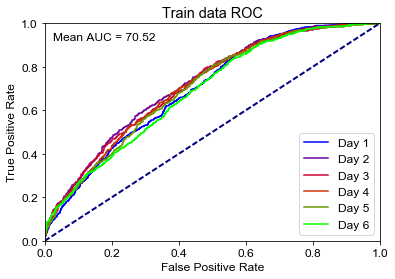

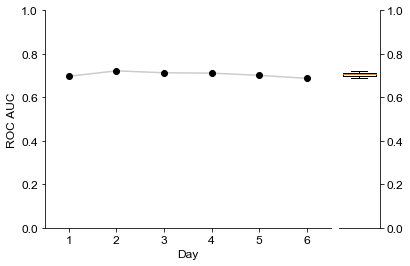

Mean performance (ROC AUC): 70.52%
Coefficient of variation: 1.622%


In [6]:
fpr = [0] * numDay
tpr = [0] * numDay
rocAUC = [0] * numDay
s1 = plt.figure()

color = cm.brg(np.linspace(0, 1, numDay))
s = "Day {}"

for k in range(numDay):
    fpr[k], tpr[k], _ = roc_curve(Y_arrTrain[k], y_scoreTrain[k])
    rocAUC[k] = auc(fpr[k], tpr[k])

    plt.plot(fpr[k], tpr[k], c = color[k], label = s.format(k+1))
        
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.025, 0.925, 'Mean AUC = %0.2f' % (np.mean(rocAUC)*100), horizontalalignment = 'left')
plt.legend(loc = 'lower right')

plt.title('Train data ROC')
plt.show()

s = "data/pyData/GraphOutput/{}_TrainROC"
s1.savefig(s.format(IDnumber))

s2 = plt.figure()
ax0 = plt.subplot2grid((1, numDay+1), (0, 0), colspan = numDay)
plt.plot(range(1,numDay+1), rocAUC, linestyle = '-', c = '0.8')
plt.plot(range(1,numDay+1), rocAUC, 'ko')

plt.ylim([0, 1])
plt.ylabel('ROC AUC')
plt.xlim([0.5, numDay+0.5])
plt.xlabel('Day')
plt.xticks(np.arange(1, numDay+1))

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax1 = plt.subplot2grid((1, numDay+1), (0, numDay), colspan = 1, sharey=ax0)
plt.boxplot(rocAUC, widths = 0.8)

plt.ylim([0, 1])
plt.xticks([0], (''))

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.yaxis.tick_right()

plt.show()

s = "data/pyData/GraphOutput/{}_TrainROCQuant"
s2.savefig(s.format(IDnumber))

s = "Mean performance (ROC AUC): {0:.2f}%"
print(s.format(np.mean(rocAUC)*100))
s = "Coefficient of variation: {0:.3f}%"
print(s.format(np.std(rocAUC)/np.mean(rocAUC)*100))

perf = roc_auc[:, :, comp]
holder = np.zeros((numDay, numDay))
dist = np.zeros((numDay, numDay-1))


days = list(range(0, numDay))s
for test in range(numDay):
    subtraindays = list(range(0, numDay))
    subtraindays.remove(test)
    for validate in subtraindays:
        traindays = subtraindays[:]
        traindays.remove(validate)
        holder[test, validate] = np.abs(np.mean(traindays)-validate)

        
for i in range(numDay):
    for j in range(numDay):
        if i < j: dist[i, j-1] = holder[i, j]
        if i > j: dist[i, j] = holder[i, j]

dist = dist.reshape(numDay * (numDay-1))
perf = perf.reshape(numDay * (numDay-1))

#for c in range(len(components)):
perf = roc_auc[:, :, comp]
perf.reshape(numDay * (numDay-1))
plt.scatter(dist, perf)
plt.ylim([0, 1])
plt.show()